In [32]:
import pandas as pd
import numpy as np
import rdkit 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import mols2grid
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem, PandasTools

In [33]:
#df = pd.read_csv('glide_xp_results.csv')
df = pd.read_csv('glide_xp_results_noConstraints.csv')
df.shape

(26, 64)

In [34]:
df.head(3)

,i_epik_Tot_Q,i_epik_Tot_abs_Q,i_glide_XP_PoseRank,i_i_glide_confnum,i_i_glide_lignum,i_i_glide_posenum,i_i_glide_rotatable_bonds,i_lp_mmshare_version,i_m_Source_File_Index,i_m_source_file_index,...,s_phase_Alignment_Method,s_phase_Alignment_Reason,s_phase_Core_SMARTS,ID,ROMol,r_epik_basic_macro-pKa_1,r_epik_basic_macro-pKa_2,SMILES,pIC50,Experimental deltaG
0,0,0,1,1,13,9,7,70133,7,7,...,snapped core,NaN,[#6]1(:&@[#6]:&@[#6]:&@[#6](:&@[#6](:&@[#6]:&@...,5,<rdkit.Chem.rdchem.Mol object at 0x1258d4120>,NaN,NaN,Cc1ccc(O)cc1Nc1ccnc2ccc(C(=O)NCC3CCOCC3)cc12,7.69897,-10.50411
1,0,0,1,1,15,6,7,70133,8,8,...,snapped core,NaN,[#6]1(:&@[#6]:&@[#6]:&@[#6](:&@[#6](:&@[#6]:&@...,12,<rdkit.Chem.rdchem.Mol object at 0x1258d4190>,NaN,NaN,Cc1ccc(O)cc1Nc1ccnc2ccc(C(=O)NC[C@H]3CCCOC3)cc12,NaN,NaN
2,0,0,1,1,16,1,7,70133,8,8,...,snapped core,NaN,[#6]1(:&@[#6]:&@[#6]:&@[#6](:&@[#6](:&@[#6]:&@...,12,<rdkit.Chem.rdchem.Mol object at 0x1434e2ff0>,NaN,NaN,Cc1ccc(O)cc1Nc1ccnc2ccc(C(=O)NC[C@@H]3CCCOC3)cc12,NaN,NaN


In [35]:
df.columns

Index(['i_epik_Tot_Q', 'i_epik_Tot_abs_Q', 'i_glide_XP_PoseRank',
       'i_i_glide_confnum', 'i_i_glide_lignum', 'i_i_glide_posenum',
       'i_i_glide_rotatable_bonds', 'i_lp_mmshare_version',
       'i_m_Source_File_Index', 'i_m_source_file_index',
       'i_phase_Input_Structure_Number', 'i_phase_Reference_Structure',
       'i_phase_Structure_Number', 'i_f3d_flags',
       'b_lp_Chiralities_Consistent', 'b_m_subgroup_collapsed',
       'r_epik_Population', 'r_epik_State_Penalty',
       'r_epik_acidic_macro-pKa_1', 'r_epik_acidic_macro-pKa_2',
       'r_epik_acidic_macro-pKa_3', 'r_epik_macro-pKa_(-1,0)',
       'r_epik_macro-pKa_(-2,-1)', 'r_epik_macro-pKa_(0,1)',
       'r_epik_macro-pKa_(1,2)', 'r_glide_XP_GScore', 'r_glide_XP_HBond',
       'r_i_docking_score', 'r_i_glide_ecoul', 'r_i_glide_eff_state_penalty',
       'r_i_glide_einternal', 'r_i_glide_emodel', 'r_i_glide_energy',
       'r_i_glide_evdw', 'r_i_glide_gscore', 'r_i_glide_ligand_efficiency',
       'r_i_glide_ligan

In [36]:
#too many columns, select only relevant ones
selected_cols = ['ID','SMILES','ROMol', 'pIC50', 'Experimental deltaG', 'r_i_docking_score', 'r_i_glide_ligand_efficiency', 'IC50 RIKP2 (nM)']
dfc = df[selected_cols]
dfc.head(6)

,ID,SMILES,ROMol,pIC50,Experimental deltaG,r_i_docking_score,r_i_glide_ligand_efficiency,IC50 RIKP2 (nM)
0,5,Cc1ccc(O)cc1Nc1ccnc2ccc(C(=O)NCC3CCOCC3)cc12,<rdkit.Chem.rdchem.Mol object at 0x1258d4120>,7.698970,-10.504110,-11.7140,-0.403930,20.0
1,12,Cc1ccc(O)cc1Nc1ccnc2ccc(C(=O)NC[C@H]3CCCOC3)cc12,<rdkit.Chem.rdchem.Mol object at 0x1258d4190>,NaN,NaN,-11.6022,-0.400075,NaN
2,12,Cc1ccc(O)cc1Nc1ccnc2ccc(C(=O)NC[C@@H]3CCCOC3)cc12,<rdkit.Chem.rdchem.Mol object at 0x1434e2ff0>,NaN,NaN,-11.4048,-0.393269,NaN
3,11,Cc1ccc(O)cc1Nc1ccnc2ccc(S(C)(=O)=O)cc12,<rdkit.Chem.rdchem.Mol object at 0x1434e2260>,8.522879,-11.628212,-10.9112,-0.474399,3.0
4,3,Cc1ccc(O)cc1Nc1ccnc2ccc(C(F)(F)F)cc12,<rdkit.Chem.rdchem.Mol object at 0x1434e30d0>,8.096910,-11.047040,-10.8147,-0.470206,8.0
5,6,Cc1ccc(O)cc1Nc1ccnc2ccc(-c3cccnc3)cc12,<rdkit.Chem.rdchem.Mol object at 0x1434e3140>,8.000000,-10.914821,-10.7796,-0.431186,10.0


In [37]:
# keep the molecule with ID with the best glide score (lowest/most negative is better)
dfc = dfc.loc[dfc.groupby('ID')['r_i_docking_score'].idxmin()]
dfc = dfc.reset_index(drop=True)
dfc

,ID,SMILES,ROMol,pIC50,Experimental deltaG,r_i_docking_score,r_i_glide_ligand_efficiency,IC50 RIKP2 (nM)
0,1,CC(C)(C)S(=O)(=O)c1ccc2nccc(Nc3n[nH]c4ccc(F)cc...,<rdkit.Chem.rdchem.Mol object at 0x1434e3300>,8.301030,-11.325532,-9.43196,-0.336856,5.0
1,2,CC(C)S(=O)(=O)c1ccc2nccc(Nc3n[nH]c4ccc(F)cc34)...,<rdkit.Chem.rdchem.Mol object at 0x1434e3290>,8.000000,-10.914821,-9.45806,-0.350298,10.0
2,3,Cc1ccc(O)cc1Nc1ccnc2ccc(C(F)(F)F)cc12,<rdkit.Chem.rdchem.Mol object at 0x1434e30d0>,8.096910,-11.047040,-10.81470,-0.470206,8.0
3,4,COc1ccc2nccc(Nc3cc(O)ccc3C)c2c1,<rdkit.Chem.rdchem.Mol object at 0x1434e31b0>,6.602060,-9.007538,-10.67310,-0.508245,250.0
4,5,Cc1ccc(O)cc1Nc1ccnc2ccc(C(=O)NCC3CCOCC3)cc12,<rdkit.Chem.rdchem.Mol object at 0x1258d4120>,7.698970,-10.504110,-11.71400,-0.403930,20.0
5,6,Cc1ccc(O)cc1Nc1ccnc2ccc(-c3cccnc3)cc12,<rdkit.Chem.rdchem.Mol object at 0x1434e3140>,8.000000,-10.914821,-10.77960,-0.431186,10.0
6,7,Cc1ccc(O)cc1Nc1ccnc2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x1434e3220>,6.200659,-8.459886,-10.42680,-0.548781,630.0
7,8,CS(=O)(=O)c1ccc2nccc(Nc3n[nH]c4ccc(F)cc34)c2c1,<rdkit.Chem.rdchem.Mol object at 0x1434e3370>,7.301030,-9.961179,-9.16332,-0.366533,50.0
8,9,CS(=O)(=O)c1ccc2nccc(Nc3ccc4scnc4c3)c2c1,<rdkit.Chem.rdchem.Mol object at 0x1434e3530>,8.200659,-11.188591,-7.81920,-0.325800,6.3
9,10,CS(=O)(=O)c1ccc2nccc(Nc3ccc4nn[nH]c4c3)c2c1,<rdkit.Chem.rdchem.Mol object at 0x1434e35a0>,7.301030,-9.961179,-7.68583,-0.320243,50.0


In [38]:
#plot a regression plot between Experimental deltaG and r_glide_XP_GScore, put a r score on the plot
from scipy.stats import pearsonr
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Filter out rows with missing Experimental deltaG values
dfc_filtered = dfc.dropna(subset=['Experimental deltaG'])

# Calculate correlation coefficient
r_value, p_value = pearsonr(dfc_filtered['Experimental deltaG'], dfc_filtered['r_i_docking_score'])

# Fit linear regression for trend line
X = dfc_filtered['Experimental deltaG'].values.reshape(-1, 1)
y = dfc_filtered['r_i_docking_score'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Create interactive plot
fig = go.Figure()

# Add scatter plot with text labels
fig.add_trace(go.Scatter(
    x=dfc_filtered['Experimental deltaG'],
    y=dfc_filtered['r_i_docking_score'],
    mode='markers+text',
    name='Data points',
    marker=dict(size=8, color='steelblue', opacity=0.6),
    text=dfc_filtered['ID'],
    textposition='top center',
    textfont=dict(size=8),
    hovertemplate='<b>ID: %{text}</b><br>Experimental deltaG: %{x:.2f}<br>Glide docking score: %{y:.2f}<extra></extra>'
))

# Add regression line
fig.add_trace(go.Scatter(
    x=dfc_filtered['Experimental deltaG'],
    y=y_pred,
    mode='lines',
    name='Regression line',
    line=dict(color='darkblue', width=2)
))

fig.update_layout(
    title=f'Regression plot between Experimental deltaG and Glide XP GScore<br>R = {r_value:.3f}',
    xaxis_title='Experimental deltaG',
    yaxis_title='Glide XP GScore',
    width=800,
    height=600,
    hovermode='closest'
)

fig.show()

In [39]:
import math

def docking_to_ic50(deltaG_kcal, temperature=298.0):
    """
    Convert a docking binding energy (ΔG, kcal/mol) into an estimated IC50 (nM).

    Parameters
    ----------
    deltaG_kcal : float or list[float]
        Docking score(s) or binding free energy in kcal/mol (negative value means favorable binding).
    temperature : float, optional
        Temperature in Kelvin (default = 298 K).

    Returns
    -------
    float or list[float]
        Estimated IC50 (or Kd) in nM units.
    """
    R = 1.987e-3  # kcal·mol⁻¹·K⁻¹
    RT = R * temperature

    def calc_ic50(dG):
        Kd_M = math.exp(dG / RT)       # Kd in mol/L
        Kd_nM = Kd_M * 1e9             # convert to nM
        return Kd_nM

    if isinstance(deltaG_kcal, (list, tuple)):
        return [calc_ic50(dG) for dG in deltaG_kcal]
    else:
        return calc_ic50(deltaG_kcal)


# Example usage
if __name__ == "__main__":
    docking_scores = [-11.64, -11.44, -9.5, -11.76]
    ic50_values = docking_to_ic50(docking_scores)

    for score, ic50 in zip(docking_scores, ic50_values):
        print(f"ΔG = {score:6.2f} kcal/mol → IC50 ≈ {ic50:8.2f} nM")


ΔG = -11.64 kcal/mol → IC50 ≈     2.90 nM
ΔG = -11.44 kcal/mol → IC50 ≈     4.07 nM
ΔG =  -9.50 kcal/mol → IC50 ≈   107.70 nM
ΔG = -11.76 kcal/mol → IC50 ≈     2.37 nM


In [40]:
dfc.head(6)

,ID,SMILES,ROMol,pIC50,Experimental deltaG,r_i_docking_score,r_i_glide_ligand_efficiency,IC50 RIKP2 (nM)
0,1,CC(C)(C)S(=O)(=O)c1ccc2nccc(Nc3n[nH]c4ccc(F)cc...,<rdkit.Chem.rdchem.Mol object at 0x1434e3300>,8.30103,-11.325532,-9.43196,-0.336856,5.0
1,2,CC(C)S(=O)(=O)c1ccc2nccc(Nc3n[nH]c4ccc(F)cc34)...,<rdkit.Chem.rdchem.Mol object at 0x1434e3290>,8.00000,-10.914821,-9.45806,-0.350298,10.0
2,3,Cc1ccc(O)cc1Nc1ccnc2ccc(C(F)(F)F)cc12,<rdkit.Chem.rdchem.Mol object at 0x1434e30d0>,8.09691,-11.047040,-10.81470,-0.470206,8.0
3,4,COc1ccc2nccc(Nc3cc(O)ccc3C)c2c1,<rdkit.Chem.rdchem.Mol object at 0x1434e31b0>,6.60206,-9.007538,-10.67310,-0.508245,250.0
4,5,Cc1ccc(O)cc1Nc1ccnc2ccc(C(=O)NCC3CCOCC3)cc12,<rdkit.Chem.rdchem.Mol object at 0x1258d4120>,7.69897,-10.504110,-11.71400,-0.403930,20.0
5,6,Cc1ccc(O)cc1Nc1ccnc2ccc(-c3cccnc3)cc12,<rdkit.Chem.rdchem.Mol object at 0x1434e3140>,8.00000,-10.914821,-10.77960,-0.431186,10.0


In [41]:
#Draw using Draw.MolsToGridImage
from rdkit.Chem import Draw
dfc['new_mol'] = dfc['SMILES'].apply(Chem.MolFromSmiles)

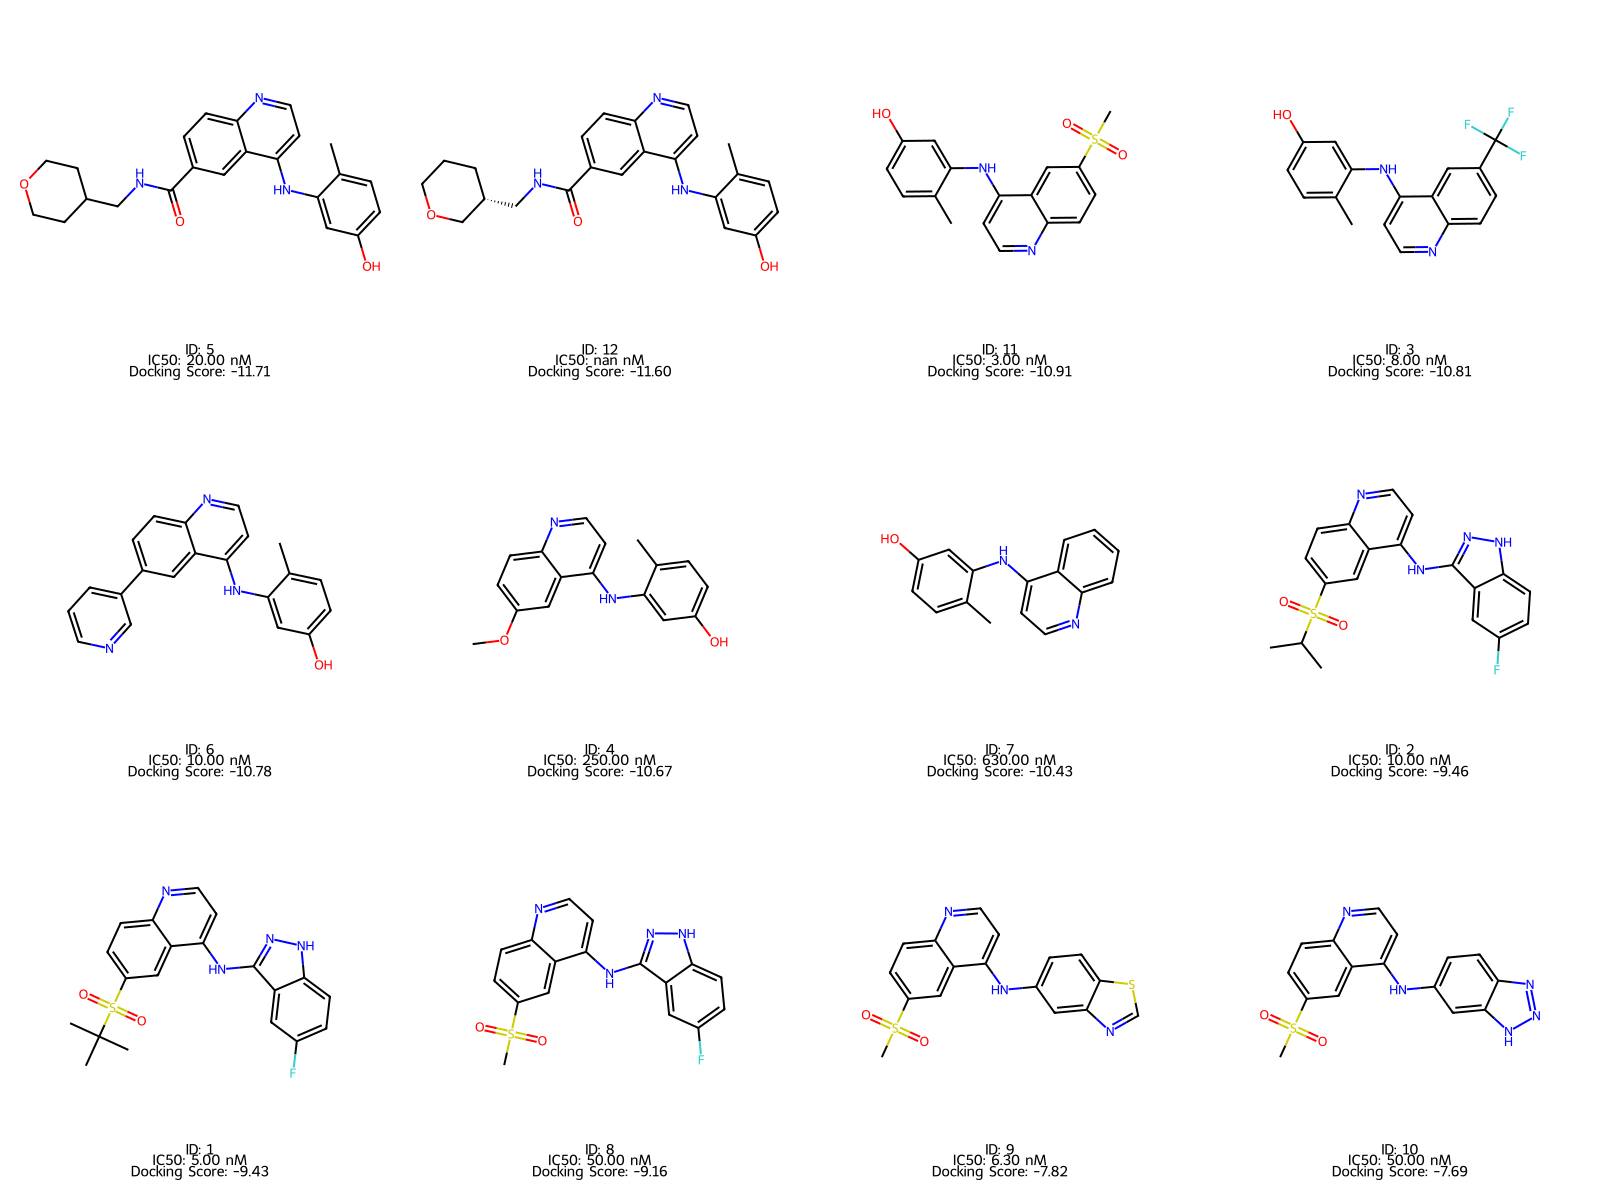

In [42]:
#sort dfc by docking score (lowest/most negative first = best binders)
dfc = dfc.sort_values('r_i_docking_score')

#legends= ID as str and IC50 values, and docking scores
legends = [f"ID: {row['ID']}\nIC50: {row['IC50 RIKP2 (nM)']:.2f} nM\nDocking Score: {row['r_i_docking_score']:.2f}" for index, row in dfc.iterrows()]

Draw.MolsToGridImage(dfc['new_mol'], molsPerRow=4, subImgSize=(400,400),legends=legends)

In [10]:
# df_smiles = dfc['SMILES']

# ok_smiles = []
# delete_smiles = []
# i=0

# for ds in df_smiles:
# 		try:
# 				cs = Chem.CanonSmiles(ds)
# 				ok_smiles.append(cs)
# 				i=i+1
# 		except:
# 				print('Invalid SMILES:', ds)
# 				delete_smiles.append(ds)
# print("")